In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
data_train = pd.read_csv('train.csv')
data_train.shape

(20758, 18)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
a = data_train.duplicated().sum()
print(a)

0


In [ ]:
data_nulls = (data_train.isnull().sum()/len(data_train))*100
nulls = data_nulls[data_nulls > 0]
print(nulls, len(nulls))

Series([], dtype: float64) 0


In [ ]:
cat_cols = data_train.select_dtypes(include='object').columns.tolist()
cat_train = pd.DataFrame(data_train[cat_cols].melt(var_name='column', value_name='value')
                      .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(data_train[cat_cols].describe())
display(cat_train)

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


count
column                         value                       
CAEC                           no                       279
                               Always                   478
                               Frequently              2472
                               Sometimes              17529
CALC                           Frequently               529
                               no                      5163
                               Sometimes              15066
FAVC                           no                      1776
                               yes                    18982
Gender                         Male                   10336
                               Female                 10422
MTRANS                         Bike                      32
                               Motorbike                 38
                               Walking                  467
                               Automobile              3534
                               Public_Transportation  16687
NObeyesdad                     Overweight_Level_I      2427
                               Overweight_Level_II     2522
                               Insufficient_Weight     2523
                               Obesity_Type_I          2910
                               Normal_Weight           3082
                               Obesity_Type_II         3248
                               Obesity_Type_III        4046
SCC                            yes                      687
                               no                     20071
SMOKE                          yes                      245
                               no                     20513
family_history_with_overweight no                      3744
                               yes                    17014

In [ ]:
data_train.head(3)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight


In [ ]:
data_train = data_train.drop('id', axis = 1)

Данные формата yes/no можно хаэнкодить посредством прсиваивания no - лейбла 0 и yes - 1. Аналогично с Gender - Female - 1, Male - 0.

In [ ]:
encoder = LabelEncoder()
data_train["Gender"]=encoder.fit_transform(data_train["Gender"])
data_train["SMOKE"]=encoder.fit_transform(data_train["SMOKE"])
data_train["SCC"]=encoder.fit_transform(data_train["SCC"])
data_train["family_history_with_overweight"]=encoder.fit_transform(data_train["family_history_with_overweight"])
data_train["FAVC"]=encoder.fit_transform(data_train["FAVC"])
data_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,no,Automobile,Normal_Weight
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
print(data_train['CAEC'].unique(),
      data_train['CALC'].unique(),
      data_train['MTRANS'].unique())

['Sometimes' 'Frequently' 'no' 'Always'] ['Sometimes' 'no' 'Frequently'] ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']


Исходя из уникальных значений CAEC их можно ранжировать при энкодинге от no до Always.Аналогично с CALC от no до Frequently.

In [ ]:
data_train['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

Исходя из уникальных значений целевых данных их можно ранжировать от Insufficient_Weight до Obesity_Type_III. От большего к меньшему.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cols = ['CAEC', 'CALC', 'NObeyesdad']
ordinalencoders = [
    OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always']]),
    OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently']]),
    OrdinalEncoder(categories=[['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']]),
]
for i, col in enumerate(cols):
    data_train[col] = ordinalencoders[i].fit_transform(data_train[col].to_frame())

In [ ]:
data_train['MTRANS'].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

Данные выглядят как номинальные, но можно предположить их ранжировку от менее активного к более активному виду транспорты. Второй варинат OHE(one hot encoding). И третий - это просто через label encodeing.

In [ ]:
data_train["MTRANS"]=encoder.fit_transform(data_train["MTRANS"])
data_train.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1.0,0,2.763573,0,0.000000,0.976473,1.0,3,3.0
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2.0,0,2.000000,0,1.000000,1.000000,0.0,0,1.0
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1.0,0,1.910378,0,0.866045,1.673584,0.0,3,0.0


Text(0.5, 1.0, 'Correlation Matrix')

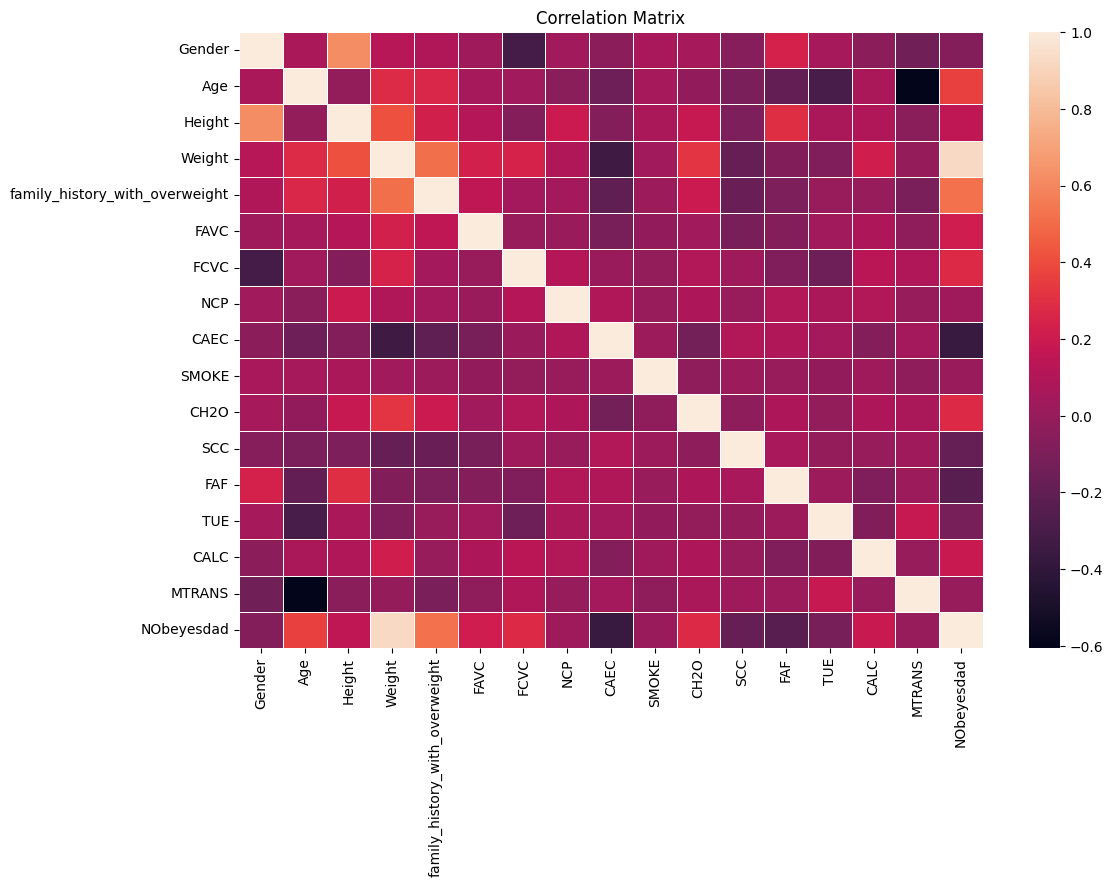

In [ ]:
correlation_matrix = data_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

Выведем выбросы

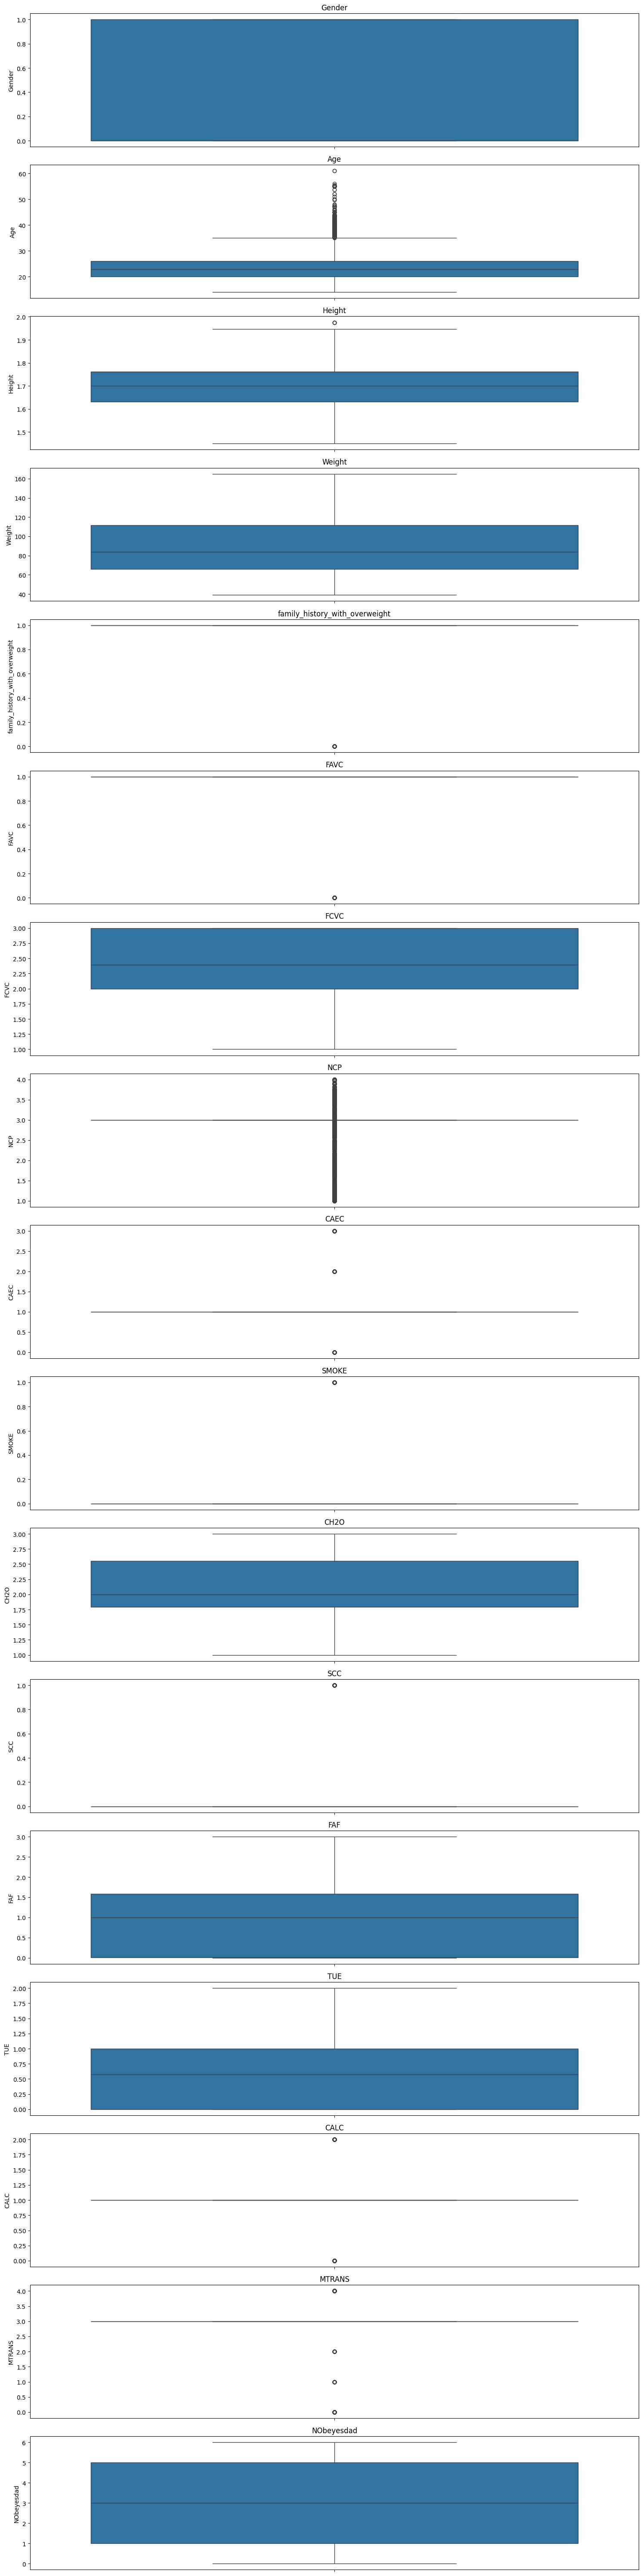

In [ ]:
columns = list(data_train.columns)
fig, axes = plt.subplots(len(columns), 1, figsize=(15, 60))
for i, column in enumerate(columns):
    sns.boxplot(data=data_train, y=column, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

графики выбросов выведены для всех параметров, но по сути для категориальных они не репрезентативны, так как они имеют опредленные значения установленные в ходе после экодинга. Поэтому выбросы удаляю только у столбцов Height и Age

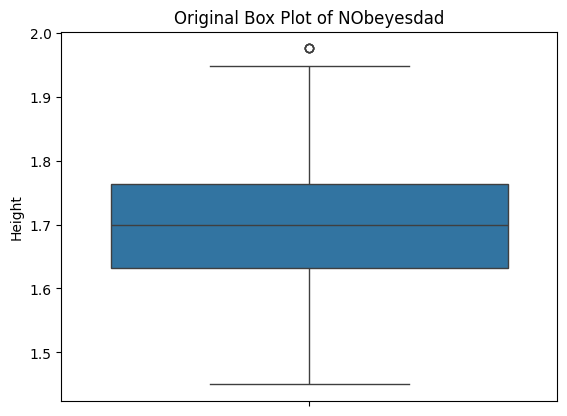

1.4353094999999998 1.9594335000000003
(20754, 17)


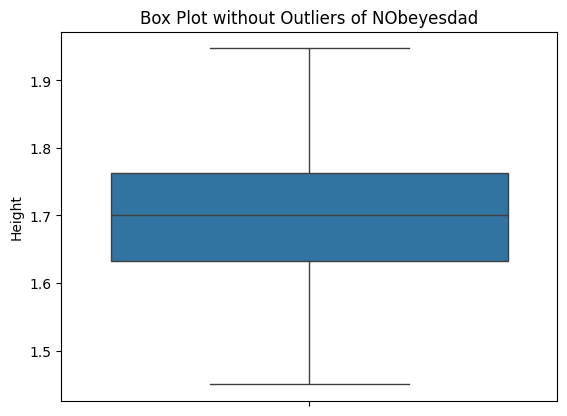

In [ ]:
sns.boxplot(data_train['Height'])
plt.title(f'Original Box Plot of {column}')
plt.show()
q1 = data_train.Height.quantile(0.25)
q3 = data_train.Height.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)
mask_out  = ((data_train.Height < lower_bound) | (data_train.Height > upper_bound))
data_train = data_train.loc[~mask_out]
print(data_train.shape)
sns.boxplot(data_train['Height'])
plt.title(f'Box Plot without Outliers of {column}')
plt.show()

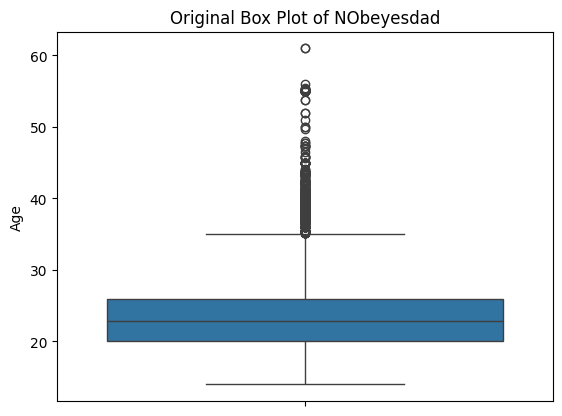

11.0 35.0
(19680, 17)


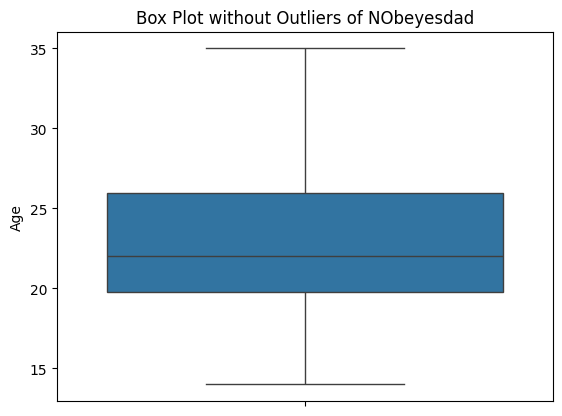

In [ ]:
sns.boxplot(data_train['Age'])
plt.title(f'Original Box Plot of {column}')
plt.show()
q1 = data_train.Age.quantile(0.25)
q3 = data_train.Age.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)
mask_out = ((data_train.Age < lower_bound) | (data_train.Age > upper_bound))
data_train = data_train.loc[~mask_out]
print(data_train.shape)
sns.boxplot(data_train['Age'])
plt.title(f'Box Plot without Outliers of {column}')
plt.show()

In [ ]:
X_train = data_train.drop(['NObeyesdad'], axis=1)
y_train = data_train['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

In [ ]:
y_test

4153     6.0
9657     6.0
1608     6.0
11498    0.0
15908    1.0
        ... 
13107    5.0
12958    1.0
202      6.0
1974     1.0
12803    4.0
Name: NObeyesdad, Length: 3936, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=8)
clf_gini.fit(X_train, y_train)
clf_gini.score(X_test, y_test)

0.8874491869918699

In [ ]:
y_pred = clf_gini.predict(X_test)
y_pred

array([6., 6., 6., ..., 6., 1., 4.])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print( classification_report(y_test, y_pred))
print( confusion_matrix(y_test, y_pred))

Accuracy: 0.8874491869918699
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       494
         1.0       0.83      0.84      0.84       611
         2.0       0.72      0.74      0.73       452
         3.0       0.83      0.77      0.80       470
         4.0       0.86      0.90      0.88       483
         5.0       0.97      0.94      0.96       627
         6.0       1.00      1.00      1.00       799

    accuracy                           0.89      3936
   macro avg       0.87      0.87      0.87      3936
weighted avg       0.89      0.89      0.89      3936

[[461  31   2   0   0   0   0]
 [ 44 513  47   7   0   0   0]
 [  2  64 336  44   6   0   0]
 [  0   7  65 363  31   4   0]
 [  0   1  14  21 433  13   1]
 [  0   0   0   4  30 591   2]
 [  0   0   1   0   1   1 796]]
